In [20]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
connection=pymysql.connect(host='localhost',
                           user='root',
                           password='99999999999',
                           database='project')

In [22]:
cursor=connection.cursor()

In [23]:
cursor.execute('select * from crime_data')
rows=cursor.fetchall()

In [24]:
for row in rows:
    print(row)

(10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3)
(190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25)
(191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4)
(191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45)
(200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26)
(200100504, '01-04-2020', '01-04-2020', 'Central', 946, 'OTHER MISCELLANEOUS CRIME', 0, 'X', 'POLICE FACILITY', 'IC', '200 E 6TH ST', 34.

In [25]:
df=pd.DataFrame(rows,columns=['DR_NO','Date_Reported','Date_Occured','Area_Name','Crime_Code','Crime_Code_Description','Victim_Age','Victim_Sex','Premises_Description','Status','Location','Latitude','Longitude'])

In [26]:
df

,DR_NO,Date_Reported,Date_Occured,Area_Name,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Premises_Description,Status,Location,Latitude,Longitude
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [8]:
#1 Where are the geographical hotspots for reported crimes?

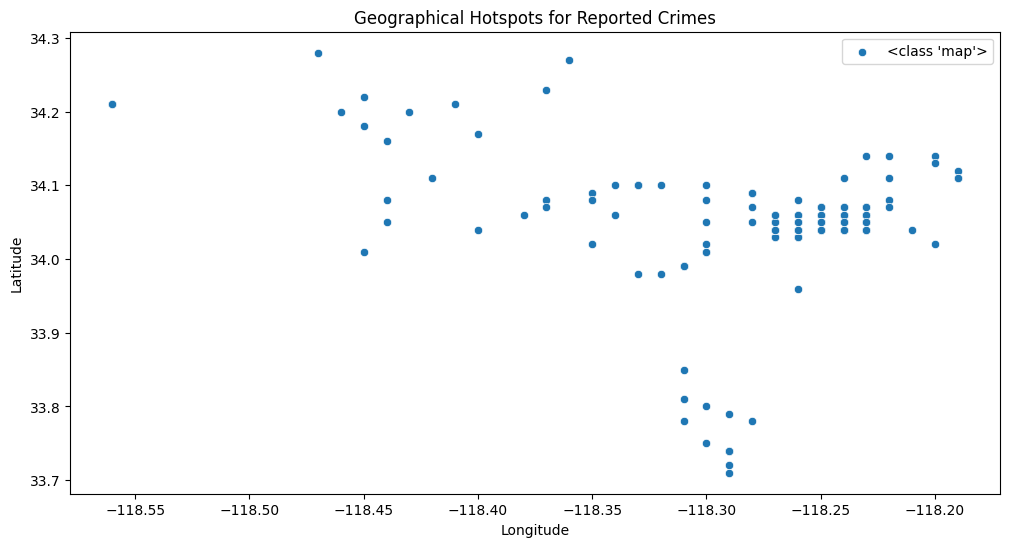

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Longitude',y='Latitude',data=df,label=map)
plt.title('Geographical Hotspots for Reported Crimes')
plt.legend()
plt.show()

In [10]:
#2A What is the distribution of victim ages in reported crimes?

In [28]:
df['Victim_Age'].unique()

array([36, 25, 76, 31, 23,  0, 29, 35, 41, 24, 40, 19, 38, 55, 66, 34, 44,
       57, 22, 28, 43, 46, 56, 67, 37, 60, 51, 52, 61, 59, 32, 30, 50, 45,
       62, 20, 58, 27, 48, 18, 26, 47, 21, 64, 39, 75, 12, 49, 71, 68, 69,
       13, 33, 53, 74, 65, 54,  8,  9, 63, 17, 73, 42, 72, 70, 78],
      dtype=int64)

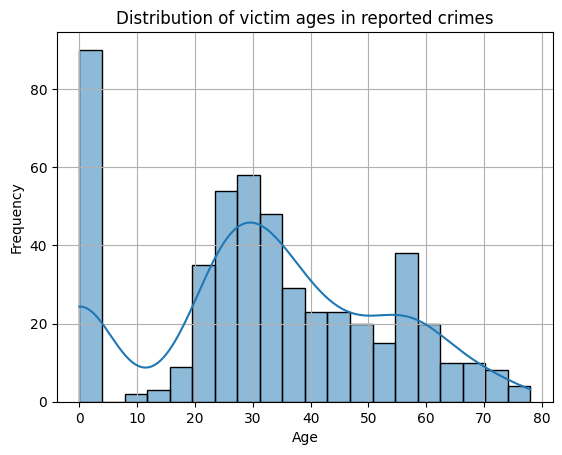

In [29]:
sns.histplot(df['Victim_Age'].dropna(),bins=20,kde=True)
plt.title('Distribution of victim ages in reported crimes')
plt.xlabel('Age')
plt.grid()
plt.ylabel('Frequency')
plt.show()

In [13]:
#2B Is there a significant difference in crime rates between male and female victims?

In [30]:
df['Victim_Sex'].unique()

array(['F', 'M', 'X', ''], dtype=object)

In [31]:
n=df.groupby(['Victim_Sex'])['Victim_Sex'].count()
labels=['','F','M','X']
n

Victim_Sex
      27
F    155
M    278
X     39
Name: Victim_Sex, dtype: int64

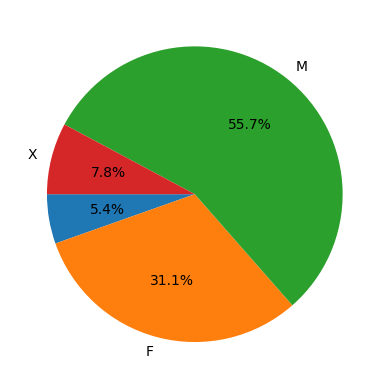

In [32]:
plt.pie(n,autopct='%1.1f%%',labels=labels,startangle=180)
plt.show()

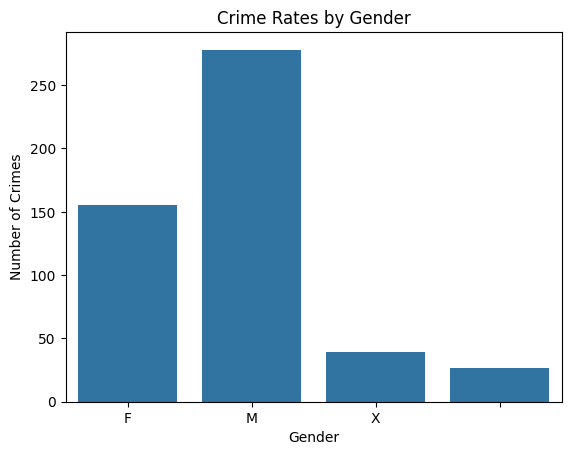

In [33]:
sns.countplot(x='Victim_Sex',data=df)
plt.title('Crime Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Crimes')
plt.show()

In [18]:
#3 Where do most crimes occur based on the "Location" column?

In [34]:
cursor.execute('Select count(*),Location from crime_data group by Location order by count(*) desc limit 5')
data=cursor.fetchall()
data

((14, '800 N ALAMEDA ST'),
 (11, '700 W 7TH ST'),
 (6, '300 E 5TH ST'),
 (6, '1100 S FIGUEROA ST'),
 (6, '6TH'))

In [35]:
df2=pd.DataFrame(data,columns=['Count','Location'])
df2

,Count,Location
0,14,800 N ALAMEDA ST
1,11,700 W 7TH ST
2,6,300 E 5TH ST
3,6,1100 S FIGUEROA ST
4,6,6TH


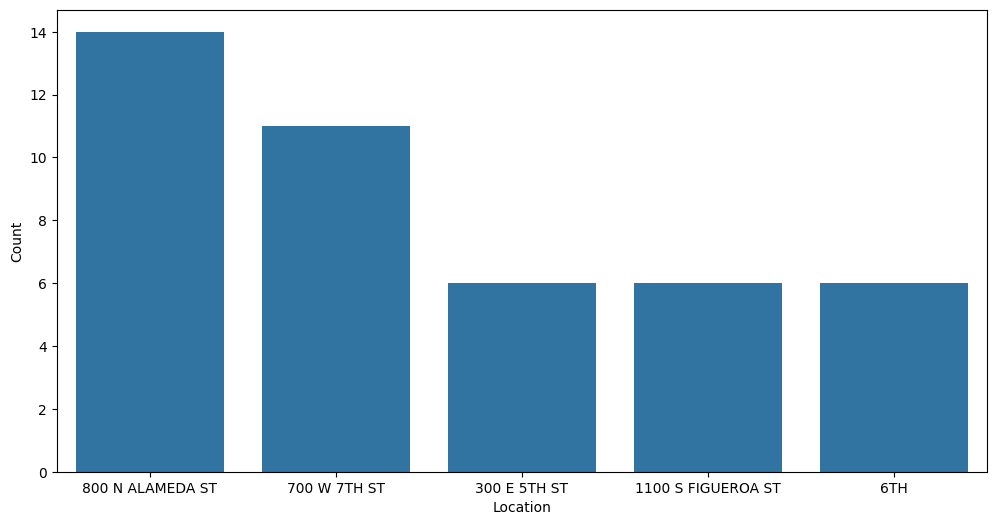

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(df2,x='Location',y='Count')
plt.show()

In [27]:
#4 What is the distribution of reported crimes based on Crime Code?

In [37]:
df['Crime_Code'].value_counts()

Crime_Code
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64

In [38]:
d=df['Crime_Code'].value_counts().index
d

Index([330, 624, 440, 442, 510, 341, 230, 740, 745, 888, 310, 210, 480, 354,
       420, 350, 930, 623, 761, 662, 946, 220, 648, 901, 850, 956, 351, 320,
       625, 886, 900, 755, 649, 940, 647, 890, 421, 820, 812, 920, 666, 343],
      dtype='int64', name='Crime_Code')

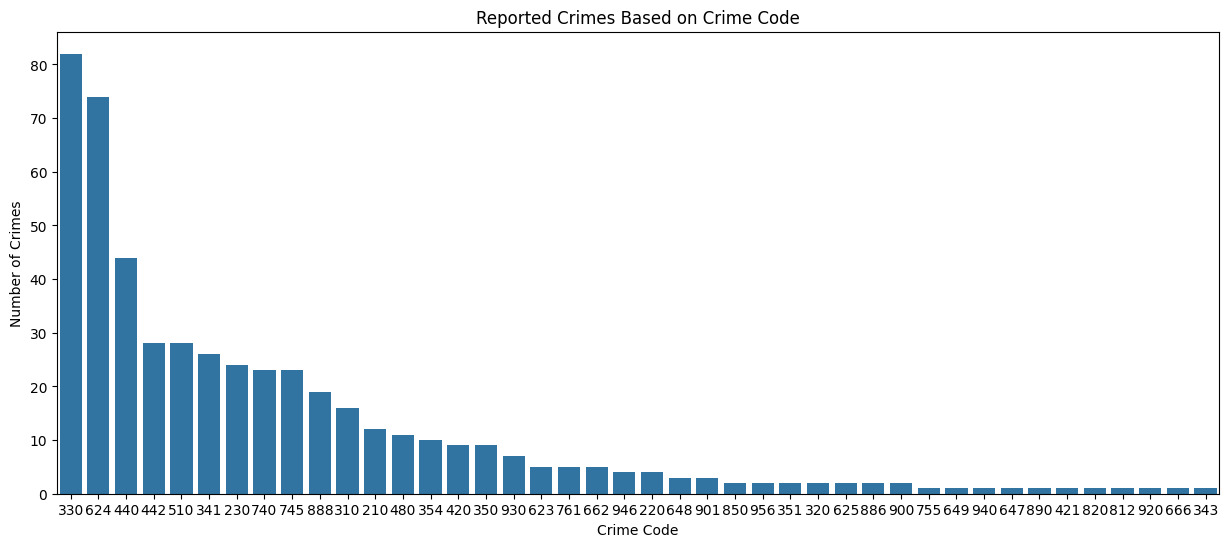

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='Crime_Code',data=df,order=d)
plt.title('Reported Crimes Based on Crime Code')
plt.xlabel('Crime Code')
plt.ylabel('Number of Crimes')
plt.show()